In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('~/Downloads/framingham.csv', sep =',')
df.rename(columns={'male':'Sex'},inplace=True)
df.isnull().sum()


Sex                  0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [28]:
df.dropna(axis=0,inplace=True)
df.isnull().sum()

Sex                0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

 I'm going to drop education column as I don't want to include it in my EDA

In [74]:
df.drop(['education'],axis=1,inplace=True) 
df.head() 


,Sex,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


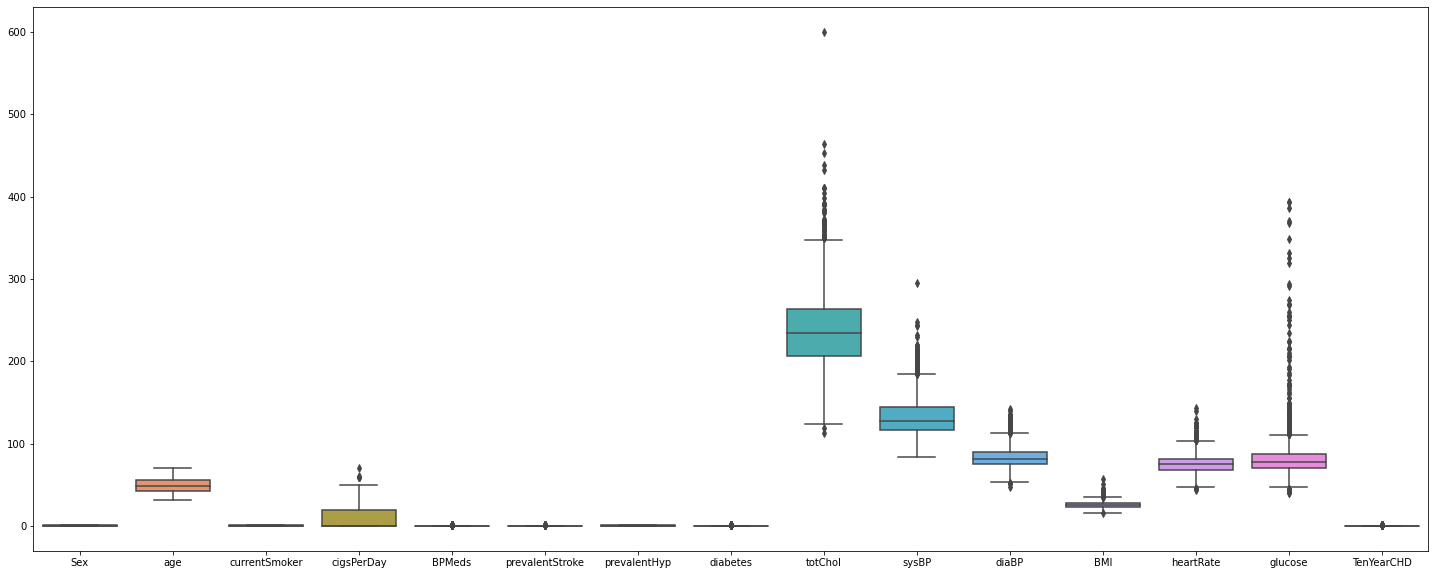

In [37]:
plt.figure(figsize=(25,10))
sns.boxplot(data=df)
plt.show()

Outliers detected in *totChol* and *sysBP* column

In [38]:
maxtotChol = df['totChol'].max()
maxsysBP = df['sysBP'].max()
print(maxsysBP)
print(maxtotChol)

295.0
600.0


In [41]:
df.shape

(3656, 15)

In [46]:
df=df[df['totChol']<600]
df=df[df['sysBP']<295]
df.shape

(3654, 15)

In [48]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Sex,3654.0,0.443897,0.496910,0.00,0.00,0.00,1.0000,1.0
age,3654.0,49.552819,8.560045,32.00,42.00,49.00,56.0000,70.0
currentSmoker,3654.0,0.489327,0.499954,0.00,0.00,0.00,1.0000,1.0
cigsPerDay,3654.0,9.027094,11.920261,0.00,0.00,0.00,20.0000,70.0
BPMeds,3654.0,0.030378,0.171648,0.00,0.00,0.00,0.0000,1.0
prevalentStroke,3654.0,0.005747,0.075602,0.00,0.00,0.00,0.0000,1.0
prevalentHyp,3654.0,0.311166,0.463034,0.00,0.00,0.00,1.0000,1.0
diabetes,3654.0,0.026820,0.161579,0.00,0.00,0.00,0.0000,1.0
totChol,3654.0,236.769294,43.696257,113.00,206.00,234.00,263.0000,464.0
sysBP,3654.0,132.316092,21.929402,83.50,117.00,128.00,143.5000,248.0


## what is the correlation between variables in each column?

Text(0.5, 1.0, 'Correlation among all the Variables of the Dataset')

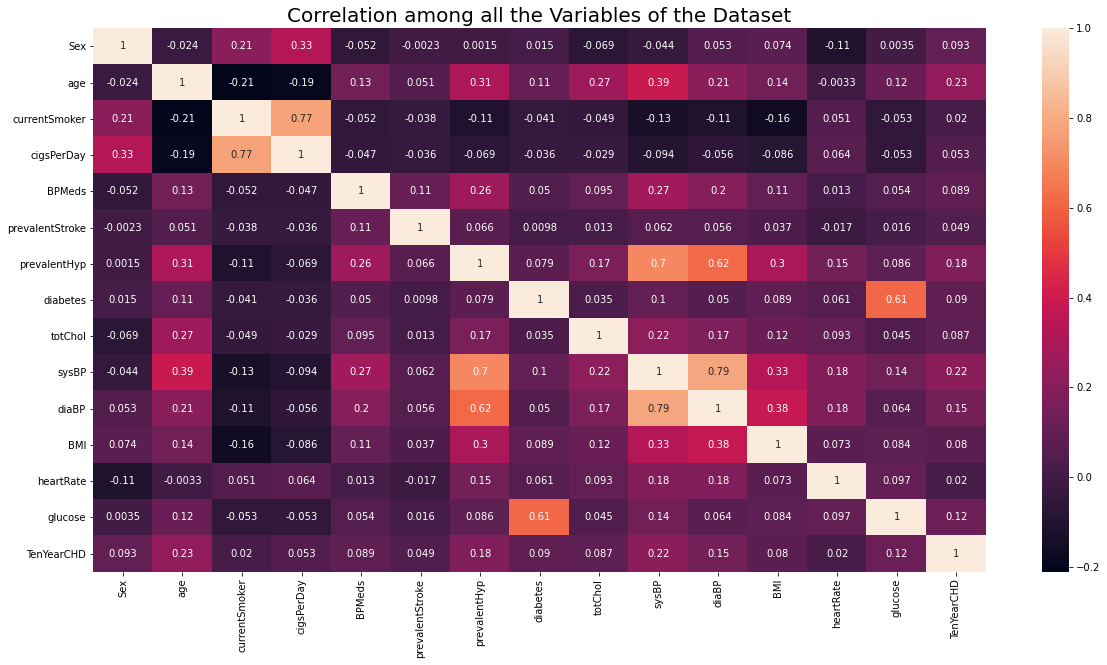

In [52]:
cor=df.corr()
plt.figure(figsize=(20,10), facecolor='w')
hmap=sns.heatmap(cor,xticklabels=cor.columns,yticklabels=cor.columns,annot=True)
plt.title("Correlation among all the Variables of the Dataset", size=20)

It seems that :
- *currentSmoker* is highly correlated t *cigPerDay* as it's obvious
- *glucose* and *diabetes* are also correlated.
- *sysBP* is correlated with *diaBP* and also *prevalentHyp*

## Are men more prone to coronary heart attack than women?

(array([  0.,  50., 100., 150., 200., 250., 300., 350.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

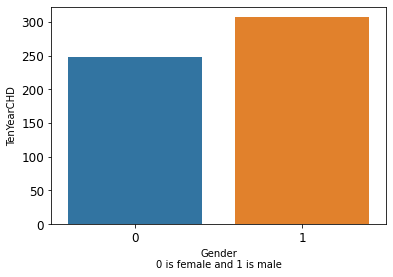

In [55]:
temp=df.groupby("Sex", as_index=False).TenYearCHD.sum()  #0 is female and 1 is male
sns.barplot(x=temp["Sex"], y=temp["TenYearCHD"])
plt.xlabel("Gender\n0 is female and 1 is male",size=10)
plt.xticks(size=12)
plt.yticks(size=12)

So the answer is yes , men are more prone to heart attack!

## how are the numerical values in each column distributed?

In [56]:
df.dtypes

Sex                  int64
age                  int64
currentSmoker        int64
cigsPerDay         float64
BPMeds             float64
prevalentStroke      int64
prevalentHyp         int64
diabetes             int64
totChol            float64
sysBP              float64
diaBP              float64
BMI                float64
heartRate          float64
glucose            float64
TenYearCHD           int64
dtype: object

C:\Users\ladan\miniconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


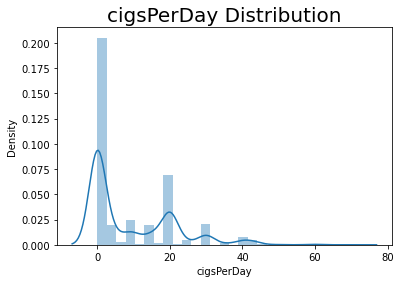

C:\Users\ladan\miniconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


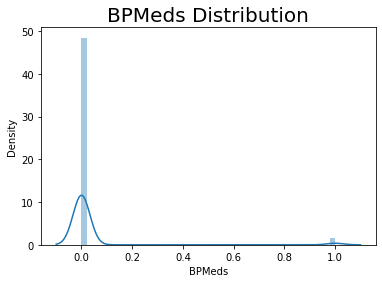

C:\Users\ladan\miniconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


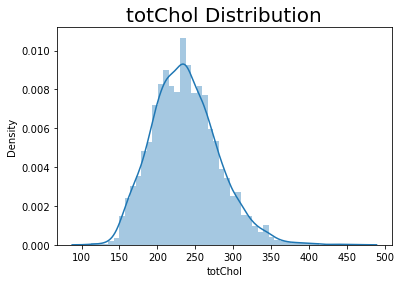

C:\Users\ladan\miniconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


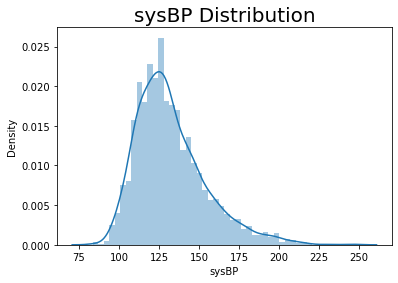

C:\Users\ladan\miniconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


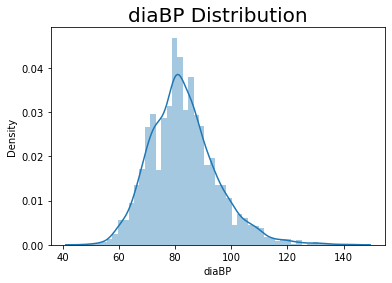

C:\Users\ladan\miniconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


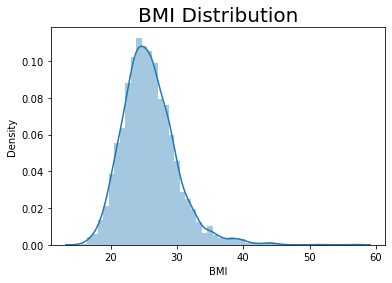

C:\Users\ladan\miniconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


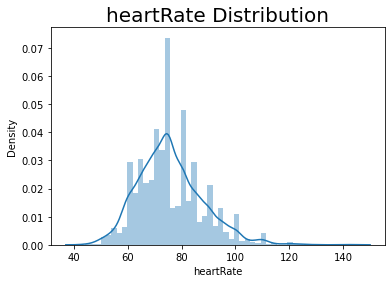

C:\Users\ladan\miniconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


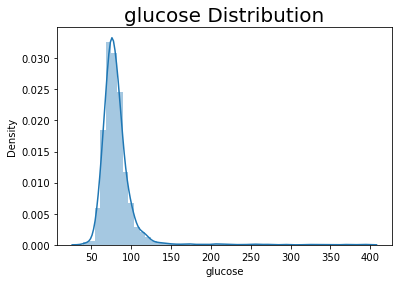

In [58]:
numerical_val = ['cigsPerDay', 'BPMeds', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']
for i in numerical_val:
    sns.distplot(df[i])
    plt.title('{} Distribution'.format(i), fontsize=20)
    plt.show()

- except for *cigsPerDay* and *BPMeds* , rest are normally distributed.

## what is the relationship between age and total cholestrole level?

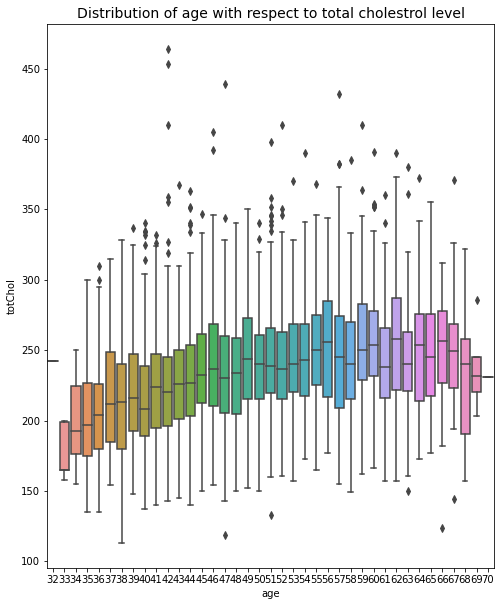

In [67]:
sns.boxplot(x="age",y="totChol",data=df)
plt.title("Distribution of age with respect to total cholestrol level", size=14)
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 8
fig_size[1] = 10
plt.rcParams["figure.figsize"] = fig_size
plt.show()

we can see a upward shift on the boxplots as age increases.

## Relationship between age, glucose level systolic or diastolic blood pressure?

(array([  0.,  50., 100., 150., 200., 250., 300., 350., 400., 450.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

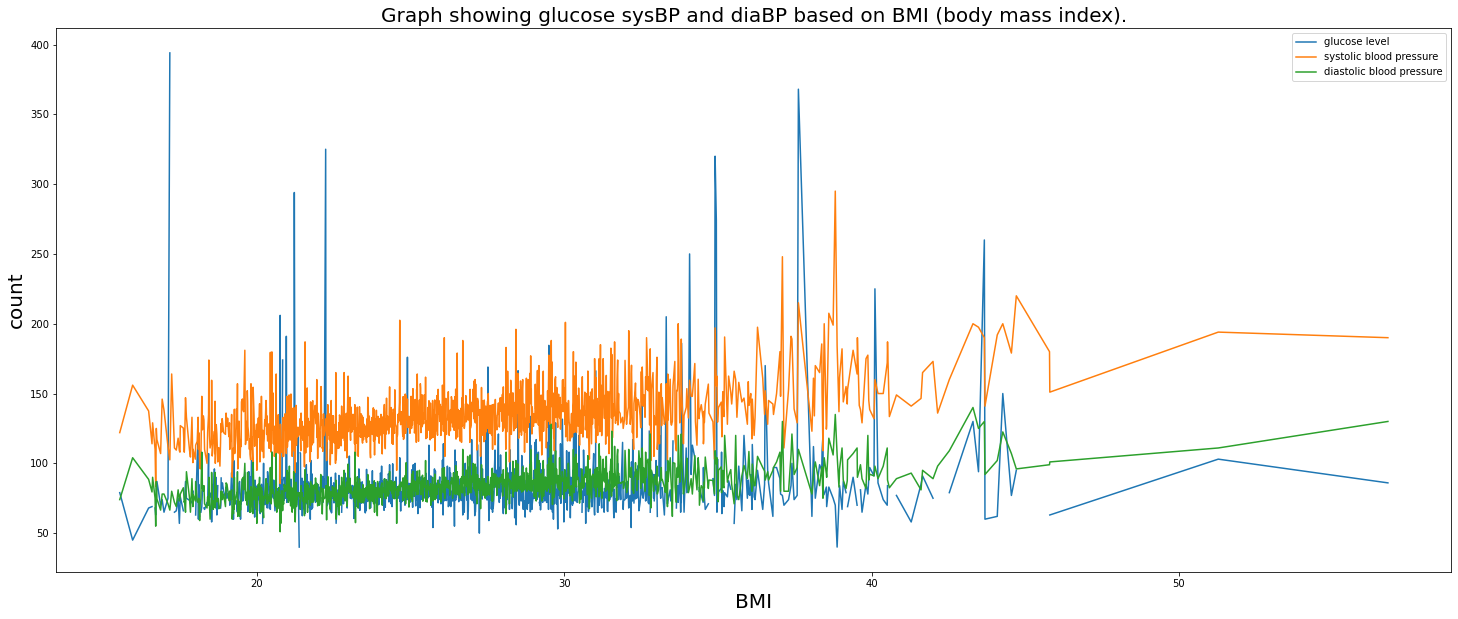

In [76]:
g1 = df.groupby("BMI").glucose.mean()
g2 = df.groupby("BMI").sysBP.mean()
g3 = df.groupby("BMI").diaBP.mean()

plt.figure(figsize=(25,10))
sns.lineplot(data=g1, label="glucose level")
sns.lineplot(data=g2, label="systolic blood pressure")
sns.lineplot(data=g3, label="diastolic blood pressure")
plt.title("Graph showing glucose sysBP and diaBP based on BMI (body mass index).", size=20)
plt.xlabel("BMI", size=20)
plt.ylabel("count", size=20)
plt.xticks(size=10)
plt.yticks(size=10)

- I cant see any significant relationship between BMI and glucose level
- we can tell that for $BMI > 40$ both blood pressure are higher than before but there are alot of variation to be confidence about this claim